In [ ]:
#importovanie knižníc

In [1]:
import pandas as pd
import sklearn
import matplotlib as plt

In [2]:
#načítanie dát

In [3]:
traindata = pd.read_csv(r'train.csv')

In [4]:
testdata = pd.read_csv(r'test.csv')

In [5]:
#zobrazenie hlavičky dát (prvých 5 riadkov)

In [6]:
traindata.head(5)

,id,timestamp,number_of_requests,number_of_errors,response_time,cpu_cores,memory_usage,cpu_usage
0,0,2022-01-22 17:12:22,9758,0.0,14742.755324,6,0.347599,48.498589
1,1,2022-01-22 17:12:27,9967,2.0,14897.201621,6,0.756413,53.355349
2,2,2022-01-22 17:12:32,5210,1.0,14009.132817,6,0.698468,46.573140
3,3,2022-01-22 17:12:37,7361,1.0,14716.491537,6,0.137349,46.624516
4,4,2022-01-22 17:12:42,9667,0.0,15148.657690,6,0.157933,49.455284


In [7]:
#nastavenie indexu a úprava formátu dátumu

In [8]:
traindata = traindata.set_index("id")

In [9]:
#vytvorenie kópie trénovacích dát a odstránenie stĺpca s dátumom pre modelovanie 

In [10]:
train2 = traindata

In [11]:
train2 = train2.drop(["timestamp"],axis=1)

In [12]:
train2.head(5)

,number_of_requests,number_of_errors,response_time,cpu_cores,memory_usage,cpu_usage
id,,,,,,
0,9758,0.0,14742.755324,6,0.347599,48.498589
1,9967,2.0,14897.201621,6,0.756413,53.355349
2,5210,1.0,14009.132817,6,0.698468,46.573140
3,7361,1.0,14716.491537,6,0.137349,46.624516
4,9667,0.0,15148.657690,6,0.157933,49.455284


In [13]:
#kontrola hodnôt NA a null

In [14]:
traindata.isnull().sum().sum()

0

In [15]:
#kontrola duplikátov

In [16]:
traindata.duplicated().sum()

0

In [17]:
#vizualizácia vzťahov atribútov s atribútov cpu_usage, ktorý bude cieľom predikcie

<AxesSubplot:xlabel='number_of_requests', ylabel='cpu_usage'>

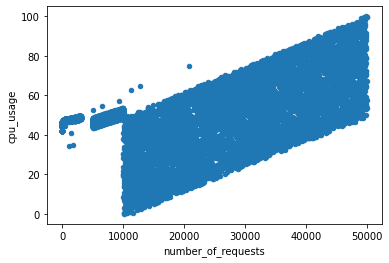

In [18]:
traindata.plot(x ='number_of_requests', y='cpu_usage', kind = 'scatter')

<AxesSubplot:xlabel='number_of_errors', ylabel='cpu_usage'>

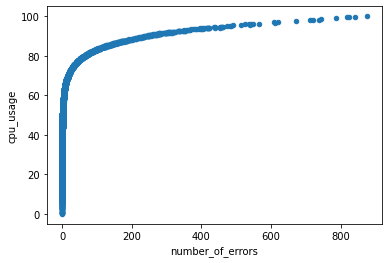

In [19]:
traindata.plot(x ='number_of_errors', y='cpu_usage', kind = 'scatter')

<AxesSubplot:xlabel='response_time', ylabel='cpu_usage'>

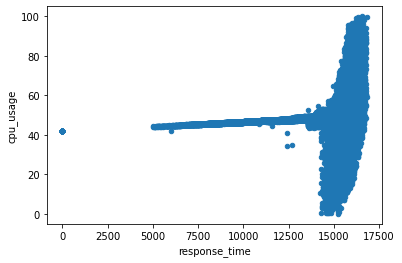

In [20]:
traindata.plot(x ='response_time', y='cpu_usage', kind = 'scatter')

<AxesSubplot:xlabel='cpu_cores', ylabel='cpu_usage'>

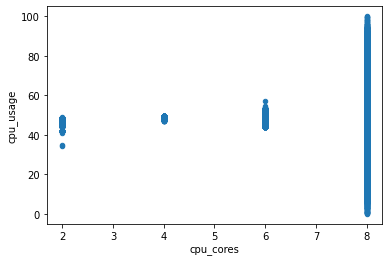

In [21]:
traindata.plot(x ='cpu_cores', y='cpu_usage', kind = 'scatter')

<AxesSubplot:xlabel='memory_usage', ylabel='cpu_usage'>

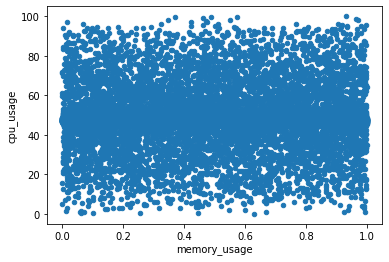

In [22]:
traindata.plot(x ='memory_usage', y='cpu_usage', kind = 'scatter')

In [23]:
#korelácia jednotlivých atribútov (number_of_errors a cpu_usage korelujú najviac)

In [24]:
traindata.corr()

,number_of_requests,number_of_errors,response_time,cpu_cores,memory_usage,cpu_usage
number_of_requests,1.000000,0.386609,0.730648,0.840201,0.000867,0.364691
number_of_errors,0.386609,1.000000,0.205799,0.224862,0.007733,0.533335
response_time,0.730648,0.205799,1.000000,0.832045,0.000957,0.183187
cpu_cores,0.840201,0.224862,0.832045,1.000000,-0.001027,0.106763
memory_usage,0.000867,0.007733,0.000957,-0.001027,1.000000,0.008249
cpu_usage,0.364691,0.533335,0.183187,0.106763,0.008249,1.000000


In [25]:
#importovanie knižníc pre trénovanie a vytvorenie modelov strojového učenia

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

In [27]:
#rozdelenie dát na testovaciu a trénovaciu množinu 
#(trénujeme iba s atribútmi number_of_errors a number_of_requests kvôli najvyššej korelácii)
#pri pridaní tretieho najviac korelovaného atribútu (response_time) sa mi zhoršila presnosť modelov

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train2[['number_of_errors', 'number_of_requests']], train2.cpu_usage, test_size=0.2,random_state=109)

In [ ]:
#1. model - rbf

In [29]:
regressor = SVR(kernel = "rbf")

In [30]:
regressor.fit(X_train, y_train)

SVR()

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
mean_squared_error(y_test, y_pred, squared=False)

5.684868309717419

In [ ]:
#4. model - KNN (k-nearest neighbours)

In [33]:
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

In [34]:
KNN_predict = KNN_model.predict(X_test)

In [35]:
mean_squared_error(y_test, KNN_predict, squared=False)

5.067008290610775

In [36]:
testdata['cpu_usage'] = KNN_model.predict(testdata[['number_of_errors', 'number_of_requests']])

In [37]:
testdata

,Unnamed: 0,timestamp,number_of_requests,number_of_errors,response_time,cpu_cores,memory_usage,cpu_usage
0,51601,2022-01-25 16:52:27,6013,1.0,13839.534811,6,0.332282,46.385686
1,51602,2022-01-25 16:52:32,8834,0.0,14657.609451,6,0.931217,48.686414
2,51603,2022-01-25 16:52:37,7971,0.0,14137.221618,6,0.803488,47.457597
3,51604,2022-01-25 16:52:42,7653,0.0,14257.821995,6,0.486343,48.605812
4,51605,2022-01-25 16:52:47,7313,0.0,14281.586371,6,0.369045,48.077256
...,...,...,...,...,...,...,...,...
17195,68796,2022-01-26 16:45:22,6401,0.0,13977.819765,6,0.863818,47.669657
17196,68797,2022-01-26 16:45:27,6525,1.0,14401.515182,6,0.300279,48.401911
17197,68798,2022-01-26 16:45:32,8342,2.0,14782.197038,6,0.165270,49.559939
17198,68799,2022-01-26 16:45:37,5355,1.0,14421.113212,6,0.377384,45.635336
